In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as gp

In [38]:
#Import the data
WHO_df = pd.read_csv('C:\\Users\\shyar\\OneDrive\\Bootcamp\\P1Shyla_Branch\\Data\\WHO.csv')
WHO_df.head()

,Year,Country Code,Country Name,Region,Sex,ICD Code,ICD Category,ICD10 Version,Deaths: All Ages,Deaths: 0-1 Years,Deaths: 1-24 Years,Deaths: 25-44 Years,Deaths: 45-69 Years,Deaths: 70-95+ Years,Deaths: Age Not Specified,Age Format,Deaths: Smoketest All Ages
0,2017,4160,Iceland,Northern Europe,1 - Male,A02,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
1,2017,4160,Iceland,Northern Europe,1 - Male,A04,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
2,2017,4160,Iceland,Northern Europe,1 - Male,A08,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0
3,2017,4160,Iceland,Northern Europe,1 - Male,A32,Infectious and parasitic diseases,103,1,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0
4,2017,4160,Iceland,Northern Europe,1 - Male,A41,Infectious and parasitic diseases,103,4,0.0,0.0,0.0,2.0,2.0,0.0,0,4.0


In [39]:
WHO_df = WHO_df[WHO_df["ICD Code"] != "AAA"]
WHO_df.value_counts("ICD Code").head(20)

ICD Code
R99     125
I64     125
J449    124
I219    124
I509    123
C349    123
J189    123
K746    123
I619    123
C169    122
N390    122
I269    122
G20     121
C229    121
G309    121
C259    121
N189    121
C20     121
C189    121
I259    120
Name: count, dtype: int64

In [4]:

#practice with too many variables
male = WHO_df.loc[(WHO_df["Sex"]=="1 - Male") & (WHO_df["ICD Category"]), "Year"]
female = WHO_df.loc[(WHO_df["Sex"]=="2 - Female") & (WHO_df["ICD Category"]), "Year"]
width = 0.3
plt.bar(np.arange(len(male)), male, width=width)
plt.bar(np.arange(len(female))+ width, female, width=width )
plt.show()


KeyboardInterrupt: 

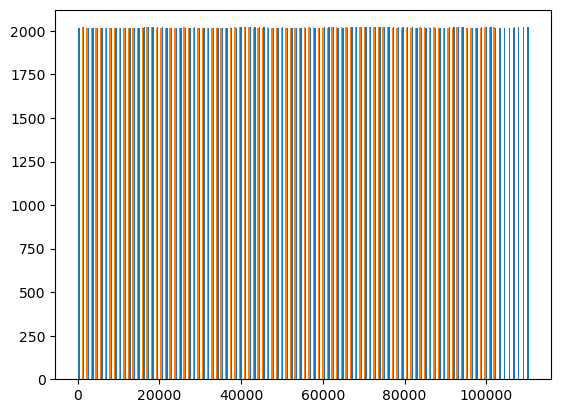

In [ ]:
#practice plotted to many variables
male = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
female = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]
width = 0.3
plt.bar(np.arange(len(male)), male, width=width)
plt.bar(np.arange(len(female))+ width, female, width=width )
plt.show()

In [41]:
#create a dataset that does not have the Unspecified Gender

Boolean_Who = WHO_df[(WHO_df["Sex"]=="1 - Male") | (WHO_df["Sex"]=="2 - Female")]
WHO_group = Boolean_Who.groupby(["Year", "Sex"])["Deaths: All Ages"].sum()
#WHO_group = WHO_group.reset_index()

#visual verification of data
display(WHO_group.value_counts("Country Name"))
display(WHO_group.value_counts("Sex"))
display(WHO_group)





Deaths: All Ages
3445978    0.1
3151265    0.1
3469057    0.1
3173171    0.1
3509727    0.1
3206834    0.1
4023972    0.1
3574911    0.1
4310107    0.1
3801725    0.1
Name: proportion, dtype: float64

Deaths: All Ages
3445978    0.1
3151265    0.1
3469057    0.1
3173171    0.1
3509727    0.1
3206834    0.1
4023972    0.1
3574911    0.1
4310107    0.1
3801725    0.1
Name: proportion, dtype: float64

Year  Sex       
2017  1 - Male      3445978
      2 - Female    3151265
2018  1 - Male      3469057
      2 - Female    3173171
2019  1 - Male      3509727
      2 - Female    3206834
2020  1 - Male      4023972
      2 - Female    3574911
2021  1 - Male      4310107
      2 - Female    3801725
Name: Deaths: All Ages, dtype: int64

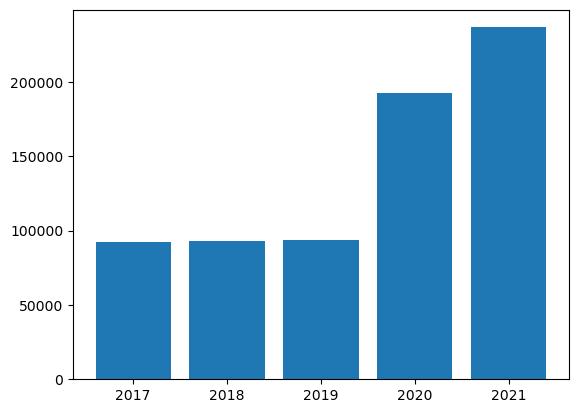

In [ ]:
#Practice bargraph Male data only
year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
plt.bar(year, male_deaths)

plt.show()

In [19]:
#create a visual with stacked bar graph
year = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Year"]
year2 = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Year"]

male_deaths = WHO_df.loc[(WHO_df["Sex"]=="1 - Male"), "Deaths: All Ages"]
female_deaths = WHO_df.loc[(WHO_df["Sex"]=="2 - Female"), "Deaths: All Ages"]

plt.bar(year, male_deaths, color='cornflowerblue', label = "Male Deaths")
plt.bar(year2, female_deaths, color='orchid', label ="Female Deaths")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.legend()
plt.title("Deaths by Gender - All Nations")
plt.ticklabel_format(style="plain")

plt.show()

AttributeError: 'str' object has no attribute 'sum'

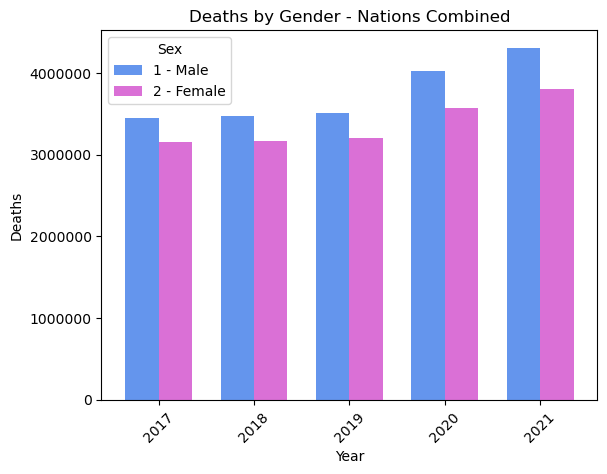

In [48]:
#Create visual to compare Male and Female deaths by year side by side

#year = WHO_group.loc[(WHO_group["Sex"]=="1 - Male"), "Year"]
#year2 = WHO_group.loc[(WHO_group["Sex"]=="2 - Female"), "Year"]

#male_deaths = WHO_group.loc[(WHO_group["Sex"]=="1 - Male"), "Deaths: All Ages"]
#female_deaths = WHO_group.loc[(WHO_group["Sex"]=="2 - Female"), "Deaths: All Ages"]

#plt.bar(year -0.2, male_deaths, width=0.4,color='cornflowerblue', label = "Male Deaths")
#plt.bar(year2 +0.2, female_deaths, width=0.4, color='orchid', label ="Female Deaths")

WHO_group.unstack().plot(kind="bar", color=["cornflowerblue", "orchid"], width=0.7)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.title("Deaths by Gender - Nations Combined")
plt.ticklabel_format(style="plain", axis="y")

plt.show()

In [ ]:
male_deaths

0        82974
1       734470
2       141099
3        55773
4         1124
5        22648
6       690683
7       207671
8        10674
9        44933
10       14818
11     1439111
24       82441
25      733616
26      145771
27       56093
28        1139
29       22423
30      699138
31      213647
32       10864
33       45456
34     1458469
46       88111
47      745519
48      146342
49       57632
50        1157
51       23008
52      707421
53      211423
54       10973
55       44318
56     1473823
68       84588
69      874167
70      159722
71       67636
72        1167
73       24920
74      706834
75      249744
76       11631
77       49712
78       23967
79     1769884
92       89401
93     1015350
94      163726
95       73435
96        1178
97       25775
98      738141
99      268658
100      12695
101      46556
102      37084
103    1838108
Name: Deaths: All Ages, dtype: int64

<Axes: xlabel='Year'>

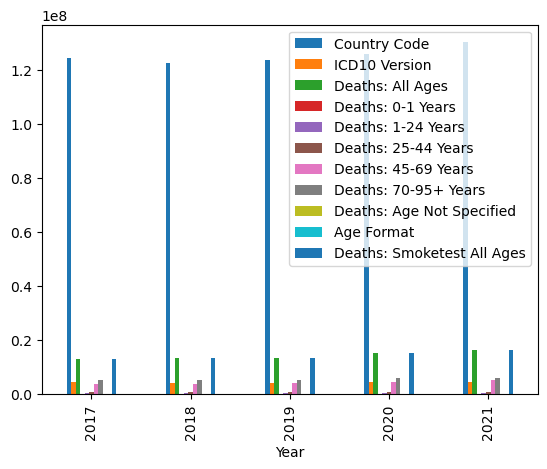

In [ ]:
WHO_group.plot(kind='bar')

In [ ]:
X = [2017, 2018, 2019, 2020, 2021]

X_axis = np.arange(len(X))

male_deaths = WHO_group.loc[(WHO_group["Sex"]=="1 - Male"), "Deaths: All Ages"]
#female_deaths = WHO_group.loc[(WHO_group["Sex"]=="2 - Female"), "Deaths: All Ages"].sum()
male_deaths
#plt.bar(year -0.2, male_deaths)
#plt.bar(year2 +0.2, female_deaths, width=0.4, color="orchid",label ="Female Deaths")

#plt.xlabel("Year")
#plt.ylabel("Death in Millions")
#plt.title("Deaths by Gender - Nations Combined")
#plt.legend()
#plt.ticklabel_format(style="plain")


plt.show()

In [ ]:
male_deaths


Series([], Name: Deaths: All Ages, dtype: int64)

In [ ]:
#create a dataset that does not have the Unspecified Gender

Boolean_Who = WHO_df[(WHO_df["Sex"]=="1 - Male") | (WHO_df["Sex"]=="2 - Female")]
WHO_group = Boolean_Who.groupby(["Year", "Sex", "Country Name"]).sum()
WHO_group = WHO_group.reset_index()

display(WHO_group.value_counts("Country Name"))
display(WHO_group.value_counts("Sex"))



Country Name
Australia                   10
Brazil                      10
Canada                      10
Chile                       10
Iceland                     10
Israel                      10
Japan                       10
Poland                      10
Singapore                   10
Sweden                      10
United States of America    10
Tunisia                      6
Name: count, dtype: int64

Sex
1 - Male      58
2 - Female    58
Name: count, dtype: int64

In [ ]:
#Check the Data
WHO_group.head(20)

,Year,Sex,Country Name,Deaths: All Ages
0,2017,1 - Male,Australia,165948
1,2017,1 - Male,Brazil,1468940
2,2017,1 - Male,Canada,282198
3,2017,1 - Male,Chile,111546
4,2017,1 - Male,Iceland,2248
5,2017,1 - Male,Israel,45296
6,2017,1 - Male,Japan,1381366
7,2017,1 - Male,Poland,415342
8,2017,1 - Male,Singapore,21348
9,2017,1 - Male,Sweden,89866


In [13]:
#clear out unused cloumns
WHO_group.drop(columns=["Deaths: 0-1 Years","Deaths: 1-24 Years","Deaths: 25-44 Years"], inplace= True)
WHO_group.drop(columns=["Deaths: 45-69 Years","Deaths: 70-95+ Years","Deaths: Age Not Specified","Age Format","Deaths: Smoketest All Ages"], inplace=True)
WHO_group.drop(columns=["Country Code", 'Region', "ICD Code", "ICD Category", "ICD10 Version"], inplace=True)

In [14]:
#group the data to plot
WHO_Country = WHO_group.groupby(["Sex", "Country Name","Deaths: All Ages"]).sum()
WHO_Country.reset_index(inplace=True)

y_death = WHO_Country["Country Name"]
x_M = WHO_Country.loc[WHO_Country["Sex"] == "1 - Male", "Deaths: All Ages"]
x_F = WHO_Country.loc[WHO_Country["Sex"] == "2 - Female", "Deaths: All Ages"] * -1



In [15]:

# Creating instance of the figure 
fig = gp.Figure() 
  
# Adding Male data to the figure 
fig.add_trace(gp.Bar(y= y_death, x = x_M,  
                     name = 'Male', 
                     marker={'color': 'cornflowerblue'},
                     orientation = 'h')) 
  
# Adding Female data to the figure 
fig.add_trace(gp.Bar(y = y_death, x = x_F,
                     marker={'color': 'orchid'}, 
                     name = 'Female', orientation = 'h')) 
  
# Updating the layout for our graph 
fig.update_layout(title = 'Total Deaths by Gender 2017-2021', 
                 title_font_size = 22, barmode = 'relative', 
                 bargap = 0.0, bargroupgap = 0, 
                 xaxis = dict(tickvals = [-8000000, -7000000, -6000000, -5000000, -4000000, -3000000, -2000000, -1000000, 
                                          0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000], 
                                
                              ticktext = ["8M","7M","6M","5M","4M","3M","2M","1M","0",  
                                          "1M","2M","3M","4M","5M","6M","7M","8M"], 
                                
                              title = 'Death in Millions', 
                              title_font_size = 14) 
                 ) 
  
fig.show()